# Statistics
A collection of formulas and methods for statistical analysis.

## Z table

Use the Z table if you know the population standard deviation. You almost never do, so this is an abreviated table. The T table below also contains Z values.

| $\%\ Confidence$ | $Z_\alpha$ | $Z_{\alpha/2}$ |
| ---- | ---- | ---- |
| 99.9 | 3.09 | 3.29 |
| 99.0 | 2.33 | 2.58 |
| 0.98 |  -   | 2.33 |
| 0.96 |  -   | 2.05 |
| 95.0 | 1.64 | 1.96 |
| 0.92 |  -   | 1.75 |
| 90.0 | 1.28 | 1.64 |
| 0.85 |  -   | 1.44 |
| 0.80 |  -   | 1.28 |
| 0.75 |  -   | 1.15 |
| 0.70 |  -   | 1.04 |

## T table

Use the T table if you only know the sample standard deviation. In the equations that follow, you can replace the Z value with the appropriate t value.

![t table](t-table.pdf)

Confidence Interval
====

Given a sample of data, it is instructive to estimate the population mean and the confidence level around that mean. In particular we would like to write something like: 

*The population mean of the data falls between $i_1$ & $i_2$ with a confidence of 95%.*  

This is easily calculated given a formula that looks like this:

$$ \mu = \overline{x} \pm t^* \cdot \frac{s}{\sqrt{n}}$$

or

$$ \mu = \overline{x} \pm z \cdot \frac{\sigma}{\sqrt{n}} $$  

where:  
$\mu$ is the estimated population mean  
$\overline{x}$ is the sample mean  
$t^*$ is from Students t distribution for the desired confidence level when we know the sample standard deviation ($n < 30$)  
$s$ is sample standard deviation  
$z$ is the z score for the desired confidence level when we know the population standard deviation ($n \ge 30$)  
$\sigma$ is population standard deviation  
$n$ is the number of samples  

### Examples

In [1]:
import numpy as np
import scipy.stats as st
import math
import random
import statistics
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# input parameters: change these to explore different scenarios
n = 30
confidence = 0.95

# create some random data
#   normal distribution, mean = 2, std = 0.2
data = st.norm.rvs(loc=2, scale=0.2, size=n)

# calculate statistics
sampleMean = data.mean()
sampleStandardDeviation = data.std()
standardErrorOfMean = st.sem(data)

# calculate interval
#   use Student's t distribution
#   use z score
TestimatedPopulationMean = st.t.interval(   confidence, len(data)-1, loc=sampleMean, scale=standardErrorOfMean)
ZestimatedPopulationMean = st.norm.interval(confidence,              loc=sampleMean, scale=standardErrorOfMean)

# print results
lower = round(TestimatedPopulationMean[0],3)
upper = round(TestimatedPopulationMean[1],3)
print(f'T: the population mean lies between {lower} and {upper} with {confidence*100}% confidence.')

lower = round(ZestimatedPopulationMean[0],3)
upper = round(ZestimatedPopulationMean[1],3)
print(f'Z: the population mean lies between {lower} and {upper} with {confidence*100}% confidence.')

# TODO: build a table of results
#   T and Z intervals by N, from 1 to 1000

T: the population mean lies between 1.955 and 2.111 with 95.0% confidence.
Z: the population mean lies between 1.958 and 2.107 with 95.0% confidence.


In [3]:
# same as above but without numpy

# input parameters: change these to explore different scenarios
n = 30
confidence = 0.95

# create some random data
#   normal distribution, mean = 2, std = 0.2
data = [random.normalvariate(2, 0.2) for i in range(n)]

# calculate statistics
mean = statistics.mean(data)
std = statistics.stdev(data)
sem = std/math.sqrt(n-1)

# calculate interval
#   use Student's t distribution
#   use z score
Tint = (mean - 2.042 * sem, mean + 2.042 * sem)
Zint = (mean - 1.96 * sem, mean + 1.96 * sem)

# print results
lower = round(Tint[0],3)
upper = round(Tint[1],3)
print(f'T: the population mean lies between {lower} and {upper} with {confidence*100}% confidence.')

lower = round(Zint[0],3)
upper = round(Zint[1],3)
print(f'Z: the population mean lies between {lower} and {upper} with {confidence*100}% confidence.')

T: the population mean lies between 1.88 and 2.045 with 95.0% confidence.
Z: the population mean lies between 1.884 and 2.041 with 95.0% confidence.


## Mean Confidence Interval
This is widely used, setting Z to 1.96 for 95% confidence.

$\mu = \bar{x} \pm Z_{\alpha/2} \cdot \frac{s}{\sqrt{N}}$  

$\bar{x} = sample\ average$  
$s = sample\ standard\ deviation$  
$N = number\ of\ observations$  

## Standard Deviation Confidence Interval

### Lower Limit
$\sigma = s\sqrt{\frac{N-1}{InverseChi(\alpha/2, N-1)}}$

### Upper Limit
$\sigma = s\sqrt{\frac{N-1}{InverseChi(1-(\alpha/2), N-1)}}$

$\alpha\ is\ the\ confidence$

## CV Confidence Interval
$CV \pm Z_{\alpha/2} \cdot \frac{CV}{\sqrt{2N}}$

## Cpk Confidence Interval

$C_{pk} \pm Z_{\alpha/2} \sqrt{\frac{1}{9N}+\frac{C_{pk}^2}{2N-2}}$

## Cpk Lower Confidence Limit

$C_{pk} - Z_{\alpha} \sqrt{\frac{1}{9N}+\frac{C_{pk}^2}{2N-2}}$

# Sample Size
$N = (\frac{Z_{\alpha/2} \cdot s}{\Delta})^2$  


$N = (\frac{1.96 \cdot s}{\Delta})^2$  

$s = standard\ deviation$  
$1.96 = 95\%\ confidence$  
$\Delta = difference\ to\ detect$  

#### Sample Size with Reliability
$N = \frac{\ln (1-Confidence)}{\ln (Reliability)}$  

$Reliability = 1 - RQL$

#### Reliability of a Sample Size
$Reliability = (1-Confidence)^{\frac{1}{N}}$  

#### Examples  

##### How many samples to get 95% confidence and an RQL of 0.65%?

In [4]:
# confidence
c = 0.95

# RQL
rql = 0.0065

# reliability
r = 1-rql

N = math.ceil(math.log(1-c)/math.log(r))

print(f'You need {round(N)} passing samples for {round(c*100)}% confidence and {round(r*100)}% reliability')

You need 460 passing samples for 95% confidence and 99% reliability


##### What is the reliability of 460 samples with a confidence of 95%?

In [5]:
# number of samples
N = 460

# confidence
c = 0.95

r = (1-c)**(1/N)
rql = 1-r

print(f'With {round(N)} passing samples you are {round(c*100)}% confident and {round(r*100)}% reliable, RQL = {round(rql*100,2)}%')

With 460 passing samples you are 95% confident and 99% reliable, RQL = 0.65%


## Continuous Data

$N = (\frac{Z \cdot s}{D})^2$

In [6]:
z = 1.96 # 95% confidence
s = 0.26 # sample standard deviation
D = 0.03 # difference to detect

N = ((z * s)/D)**2
print(f'N = {round(N)} for continuous data')

N = 289 for continuous data


## Discrete Data

In [7]:
z = 1.96
p = 0.90
D = 0.03

N = ((z)/D)**2 * p * (1-p)
print(f'N = {round(N)} for discrete data')

N = 384 for discrete data


## Effect of sample size on confidence inverval

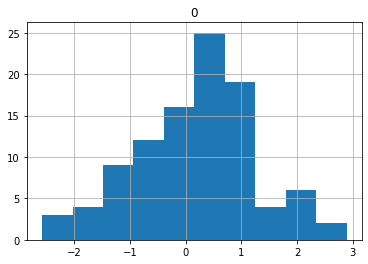

In [8]:
number_samples = 100
m = 0
s = 1
samples = [random.normalvariate(m, s) for i in range(number_samples)]
samples_df = pd.DataFrame(samples)
samples_df.hist();

In [9]:
print(f'data has a mean of {round(samples_df[0].mean(),2)} and standard deviation of {round(samples_df[0].std(),2)}')

data has a mean of 0.14 and standard deviation of 1.06


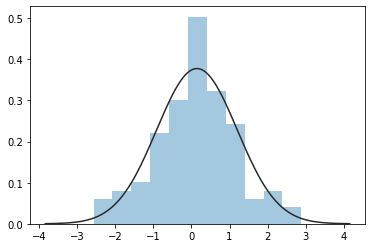

In [10]:
sb.distplot(samples, fit=st.norm, kde=False);

In [11]:
m = 0
s = 1
samples_df = pd.DataFrame(columns=['samples', 'mean', 'std', 'window'])
max_samples = 100
for i in range(2, max_samples):
    samples = [random.normalvariate(m, s) for j in range(i)]
    s_m = np.mean(samples)
    s_s = np.std(samples)
    interval = z * (s/math.sqrt(len(samples)))
    samples_df = samples_df.append({
        'samples':len(samples),
        'mean':s_m,
        'std':s_s,
        'interval':interval
    }, ignore_index=True)
samples_df

,samples,mean,std,window,interval
0,2.0,0.849838,0.165686,NaN,1.385929
1,3.0,-0.271426,1.042374,NaN,1.131607
2,4.0,-0.267419,0.785344,NaN,0.980000
3,5.0,0.144391,0.698040,NaN,0.876539
4,6.0,-0.020764,0.517904,NaN,0.800167
...,...,...,...,...,...
93,95.0,-0.164567,0.971910,NaN,0.201092
94,96.0,-0.185033,0.994274,NaN,0.200042
95,97.0,0.136731,0.986433,NaN,0.199008
96,98.0,-0.150779,0.927025,NaN,0.197990


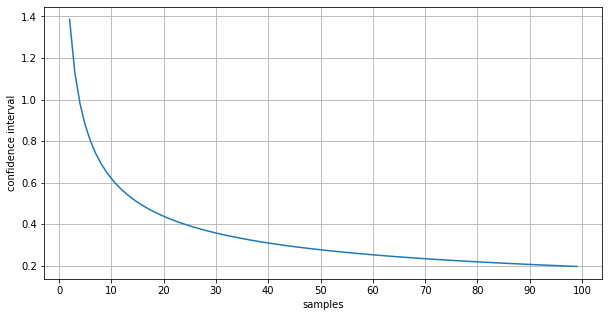

In [15]:
plt.figure(figsize=(10,5))
plt.plot(samples_df.samples, samples_df.interval)
plt.xticks(range(0,101,10))
plt.xlabel('samples')
plt.ylabel('confidence interval')
plt.grid()

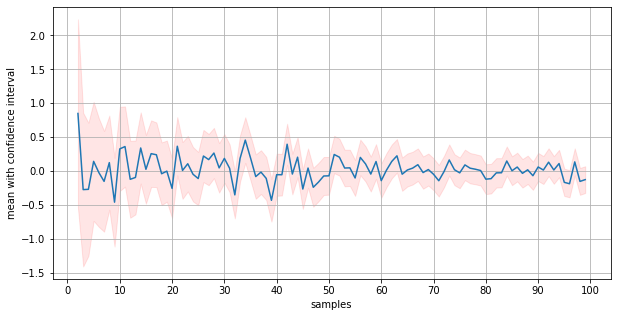

In [16]:
plt.figure(figsize=(10,5))
plt.plot(samples_df.samples, samples_df['mean'])
plt.fill_between(samples_df.samples, 
                 samples_df['mean']+samples_df.interval, 
                 samples_df['mean']-samples_df.interval,
                 color='red',
                 alpha=0.1
                )
plt.xticks(range(0,101,10))
plt.xlabel('samples')
plt.ylabel('mean with confidence interval')
plt.grid()